In [ ]:
import sys
!{sys.executable} -m pip install yfinance

[*********************100%%**********************]  1 of 1 completed
(756, 6)
Root Mean Squared Error: 8.952013442376808


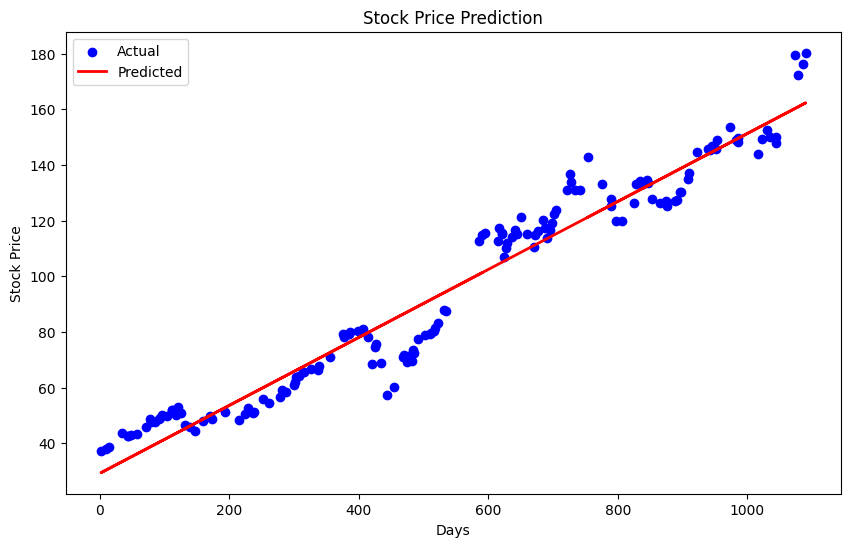

Predicted Stock Price for Next Day: [162.77266838]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pytz

# Define the stock symbol and time range
stock_symbol = "AAPL"
start_date = "2019-01-01"
end_date = "2021-12-31"

# Load the stock price data from Yahoo Finance
data = yf.download(stock_symbol, start=start_date, end=end_date)
print(data.shape)
# Reset the index to convert the 'Date' column to a regular column
data.reset_index(inplace=True)

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by date
data.sort_values(by='Date', inplace=True)

# Create a new column 'Days' representing the number of days since the first data point
data['Days'] = (data['Date'] - data['Date'].min()).dt.days

# Split the data into features (X) and target variable (y)
X = data[['Days']]
y = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

# Visualize the predicted vs. actual stock prices
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()

# Make a prediction for the next day's stock price
last_day = data['Days'].max()
next_day = last_day + 1
next_price = model.predict([[next_day]])
print("Predicted Stock Price for Next Day:", next_price)

# New Section

In [ ]:
data['Days']

0         0
1         1
2         2
3         5
4         6
       ... 
751    1086
752    1090
753    1091
754    1092
755    1093
Name: Days, Length: 756, dtype: int64

[*********************100%%**********************]  1 of 1 completed
(756, 6)
Root Mean Squared Error: 8.952013442376808


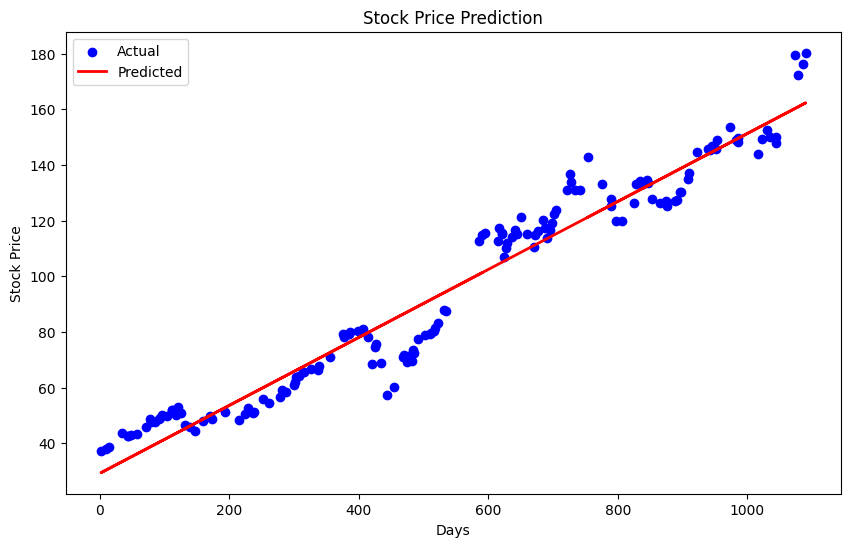

Predicted Stock Price for Next Day: [162.77266838]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pytz

# Define the stock symbol and time range
stock_symbol = "AAPL"
start_date = "2019-01-01"
end_date = "2021-12-31"

# Load the stock price data from Yahoo Finance
data = yf.download(stock_symbol, start=start_date, end=end_date)
print(data.shape)
# Reset the index to convert the 'Date' column to a regular column
data.reset_index(inplace=True)

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by date
data.sort_values(by='Date', inplace=True)

# Create a new column 'Days' representing the number of days since the first data point
data['Days'] = (data['Date'] - data['Date'].min()).dt.days

# Split the data into features (X) and target variable (y)
X = data[['Days']]
y = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

# Visualize the predicted vs. actual stock prices
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()

# Make a prediction for the next day's stock price
last_day = data['Days'].max()
next_day = last_day + 1
next_price = model.predict([[next_day]])
print("Predicted Stock Price for Next Day:", next_price)

[*********************100%%**********************]  1 of 1 completed
Epoch 1/40
556/556 [==============================] - 15s 22ms/step - loss: 0.0045 - accuracy: 0.0000e+00
Epoch 2/40
556/556 [==============================] - 12s 22ms/step - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 3/40
556/556 [==============================] - 12s 21ms/step - loss: 7.9405e-04 - accuracy: 0.0000e+00
Epoch 4/40
556/556 [==============================] - 10s 18ms/step - loss: 6.0769e-04 - accuracy: 0.0000e+00
Epoch 5/40
556/556 [==============================] - 12s 22ms/step - loss: 7.2273e-04 - accuracy: 0.0000e+00
Epoch 6/40
556/556 [==============================] - 14s 25ms/step - loss: 5.6605e-04 - accuracy: 0.0000e+00
Epoch 7/40
556/556 [==============================] - 12s 22ms/step - loss: 4.7304e-04 - accuracy: 0.0000e+00
Epoch 8/40
556/556 [==============================] - 13s 23ms/step - loss: 5.0190e-04 - accuracy: 0.0000e+00
Epoch 9/40
556/556 [==============================] - 10s 1

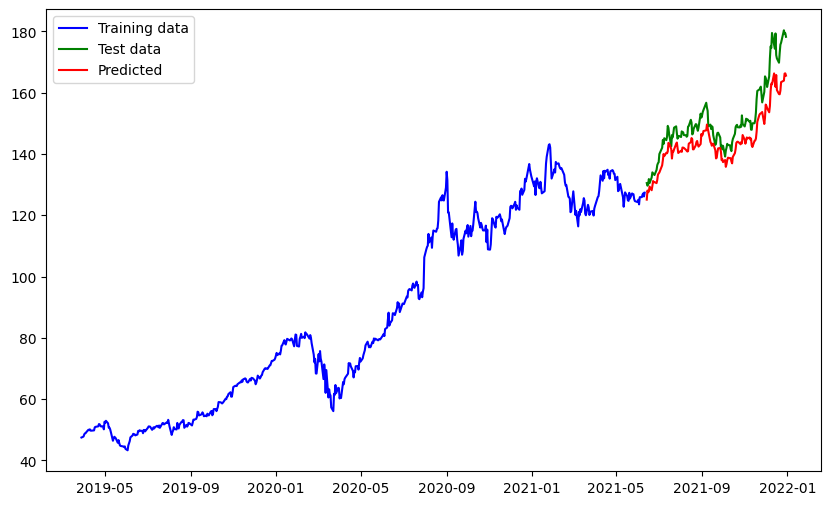

1/1 [==============================] - 0s 28ms/step
Predicted closing price for next day: 164.80653


In [ ]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt

# Load the stock price data
stock_symbol = "AAPL"
start_date = "2019-01-01"
end_date = "2021-12-31"
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

# Use 60 days of prices to predict the next one
x = []
y = []
for i in range(60, len(scaled_data)):
    x.append(scaled_data[i-60:i, 0])
    y.append(scaled_data[i, 0])
x, y = np.array(x), np.array(y)
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

# Split the data into training and testing sets
split = int(0.8 * len(x))  # Use 80% of the data for training
x_train, y_train = x[:split], y[:split]
x_test, y_test = x[split:], y[split:]

# Create the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(SimpleRNN(units=50))
model.add(Dense(1))

# Compile and train the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=40, batch_size=1)

# Make predictions
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Convert y_test back to original scale
y_test_orig = scaler.inverse_transform(y_test.reshape(-1,1))

# Calculate RMSE
rmse = np.sqrt(np.mean((predicted_prices - y_test_orig)**2))
print('Root Mean Squared Error:', rmse)

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(data['Close'].index[60:60+split], scaler.inverse_transform(y_train.reshape(-1,1)), color='blue', label='Training data')
plt.plot(data['Close'].index[60+split:], y_test_orig, color='green', label='Test data')
plt.plot(data['Close'].index[60+split:], predicted_prices, color='red', label='Predicted')
plt.legend()
plt.show()

# Predict the next day's closing price
x_last = np.array([scaled_data[-60:, 0]])  # Last 60 days of scaled data
x_last = np.reshape(x_last, (x_last.shape[0], x_last.shape[1], 1))  # Reshape for RNN
next_price_scaled = model.predict(x_last)  # Predict the scaled price
next_price = scaler.inverse_transform(next_price_scaled)  # Undo the scaling
print('Predicted closing price for next day:', next_price[0][0])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt

# Load the stock price data
stock_symbol = "AAPL"
start_date = "2019-01-01"
end_date = "2021-12-31"
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

# Use 60 days of prices to predict the next one
x = []
y = []
for i in range(60, len(scaled_data)):
    x.append(scaled_data[i-60:i, 0])
    y.append(scaled_data[i, 0])
x, y = np.array(x), np.array(y)
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

# Split the data into training and testing sets
split = int(0.8 * len(x))  # Use 80% of the data for training
x_train, y_train = x[:split], y[:split]
x_test, y_test = x[split:], y[split:]

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 4, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.1))
regressor.add(LSTM(units = 8, return_sequences = True))
regressor.add(Dropout(0.1))
regressor.add(LSTM(units = 8, return_sequences = True))
regressor.add(Dropout(0.1))
regressor.add(LSTM(units = 8, return_sequences = True))
regressor.add(Dropout(0.1))
regressor.add(LSTM(units = 8, return_sequences = True))
regressor.add(Dropout(0.1))
regressor.add(LSTM(units = 4))
regressor.add(Dropout(0.1))

regressor.add(Dense(units = 1))

In [ ]:
# @title
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics = 'mean_squared_error')
regressor.fit(x_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
18/18 [==============================] - 17s 163ms/step - loss: 0.0991 - mean_squared_error: 0.0991
Epoch 2/10
18/18 [==============================] - 2s 136ms/step - loss: 0.0382 - mean_squared_error: 0.0382
Epoch 3/10
18/18 [==============================] - 2s 136ms/step - loss: 0.0233 - mean_squared_error: 0.0233
Epoch 4/10
18/18 [==============================] - 2s 134ms/step - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 5/10
18/18 [==============================] - 3s 175ms/step - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 6/10
18/18 [==============================] - 3s 190ms/step - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 7/10
18/18 [==============================] - 2s 136ms/step - loss: 0.0086 - mean_squared_error: 0.0086
Epoch 8/10
18/18 [==============================] - 2s 138ms/step - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 9/10
18/18 [==============================] - 2s 137ms/step - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 10/

In [ ]:
predicted_prices = regressor.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Convert y_test back to original scale
y_test_orig = scaler.inverse_transform(y_test.reshape(-1,1))

# Calculate RMSE
rmse = np.sqrt(np.mean((predicted_prices - y_test_orig)**2))
print('Root Mean Squared Error:', rmse)

5/5 [==============================] - 5s 25ms/step
Root Mean Squared Error: 26.14002274297217


[*********************100%%**********************]  1 of 1 completed
            Previous_Close
Date                      
2010-01-05        6.478998
2010-01-06        6.490201
2010-01-07        6.386966
2010-01-08        6.375156
2010-01-11        6.417541
Date
2010-01-05    6.490201
2010-01-06    6.386966
2010-01-07    6.375156
2010-01-08    6.417541
2010-01-11    6.360929
Name: Adj Close, dtype: float64
Root Mean Squared Error: 62.502214148161485


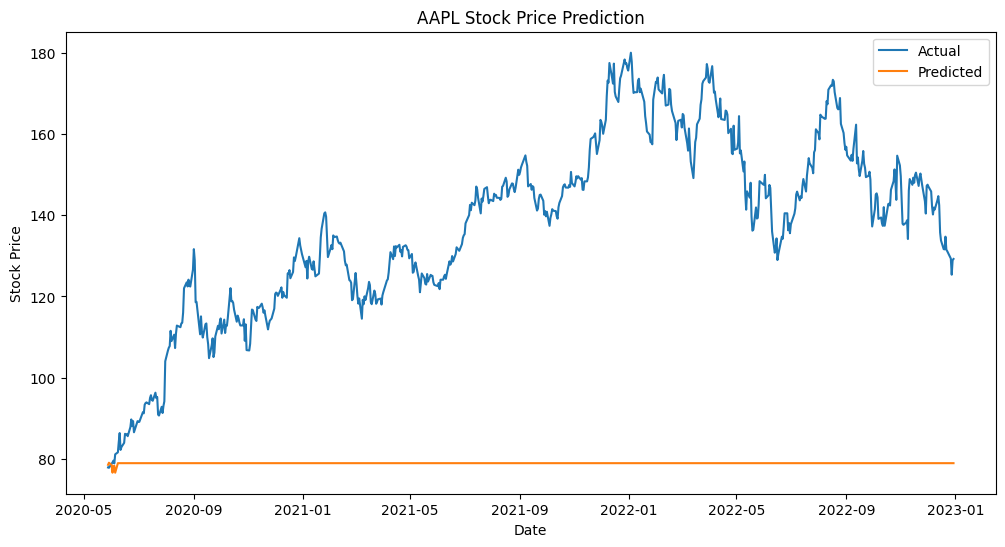

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Fetch historical stock data
ticker = 'AAPL'  # Example: Apple stock
data = yf.download(ticker, start='2010-01-01', end='2023-01-01')

# Feature engineering - using adjusted closing price and additional features if available
data['Previous_Close'] = data['Adj Close'].shift(1)  # Adding previous day's closing price as a feature
data.dropna(inplace=True)

# Define features and target variable
features = ['Previous_Close']
target = 'Adj Close'

X = data[features]
y = data[target]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
print(X_train.head())
print(y_train.head())

# Create and train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error: {rmse}")

# Visualize predictions vs actuals
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed
Epoch 1/50
82/82 [==============================] - 2s 4ms/step - loss: 0.0028
Epoch 2/50
82/82 [==============================] - 0s 4ms/step - loss: 7.3891e-04
Epoch 3/50
82/82 [==============================] - 0s 4ms/step - loss: 6.2313e-04
Epoch 4/50
82/82 [==============================] - 0s 4ms/step - loss: 5.4228e-04
Epoch 5/50
82/82 [==============================] - 0s 3ms/step - loss: 4.9512e-04
Epoch 6/50
82/82 [==============================] - 0s 4ms/step - loss: 4.7721e-04
Epoch 7/50
82/82 [==============================] - 0s 3ms/step - loss: 4.7182e-04
Epoch 8/50
82/82 [==============================] - 0s 4ms/step - loss: 4.4812e-04
Epoch 9/50
82/82 [==============================] - 0s 4ms/step - loss: 4.4514e-04
Epoch 10/50
82/82 [==============================] - 0s 4ms/step - loss: 4.3219e-04
Epoch 11/50
82/82 [==============================] - 0s 4ms/step - loss: 4.3460e-04
Epoch 12/50
82/82 [=

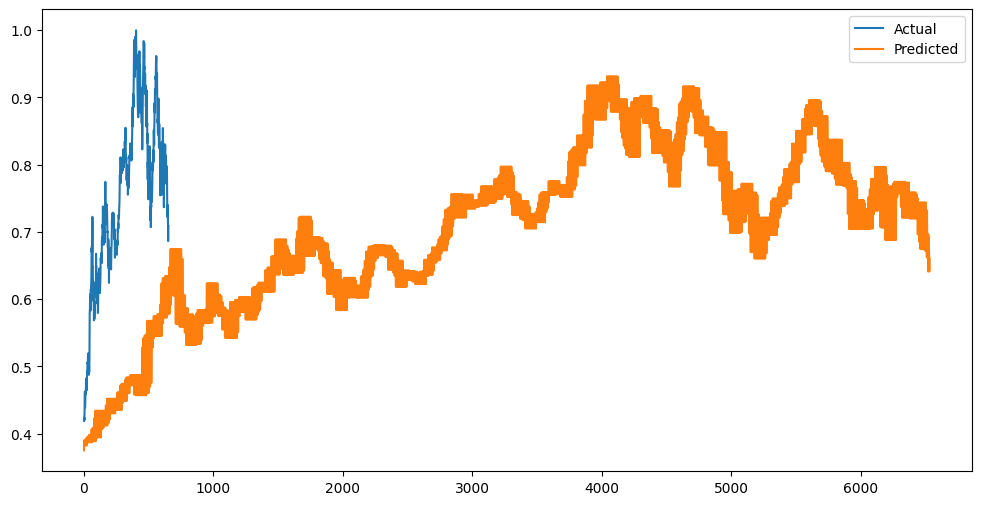

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Fetch historical stock data
ticker = 'AAPL'  # Example: Apple stock
data = yf.download(ticker, start='2010-01-01', end='2023-01-01')

# Preprocessing - using adjusted closing price
data = data[['Adj Close']]
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Function to create sequences for neural network
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Choose sequence length and split data into train/test sets
sequence_length = 10
X, y = create_sequences(data_scaled, sequence_length)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build neural network with two hidden layers
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Predictions
predictions = model.predict(X_test)
#predictions = scaler.inverse_transform(predictions)
# Inverse scaling to get actual values

# Visualize predictions vs actuals
plt.figure(figsize=(12, 6))
plt.plot(y_test.flatten(), label='Actual')  # Flatten y_test to 1D
plt.plot(predictions.flatten(), label='Predicted')  # Flatten predictions to 1D
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import requests

# Load the dataset from the CSV file
file_url = '/content/MY2020 Fuel Consumption Ratings.csv'  # Replace 'URL_TO_YOUR_CSV_FILE' with the URL of your CSV file
column_names = [
    'Model', 'Make', 'Model', 'Vehicle Class', 'Engine Size', 'Cylinders',
    'Transmission', 'Fuel', 'Fuel Consumption', 'CO2 Emissions', 'CO2', 'Smog'
]
df = pd.read_csv(file_url, names=column_names, header=0)

# Display the first few rows of the dataset
print("Initial Dataset:")
print(df.head())

# Cleaning the dataset (performing necessary data cleaning steps)
# For example, removing irrelevant columns or handling missing values
columns_to_drop = ['Model', 'Engine Size', 'Cylinders', 'Transmission', 'Fuel Consumption', 'Smog']
df_cleaned = df.drop(columns=columns_to_drop)

# Display the cleaned dataset
print("\nCleaned Dataset:")
print(df_cleaned.head())

# Save the cleaned dataset to a new CSV file
cleaned_file_name = 'cleaned_fleet_data.csv'
df_cleaned.to_csv(cleaned_file_name, index=False)

# Downloading the cleaned file
download_url = 'URL_TO_DOWNLOAD_LOCATION'  # Replace 'URL_TO_DOWNLOAD_LOCATION' with the desired download location
response = requests.get(download_url)

# Save the downloaded file to local storage
with open(cleaned_file_name, 'wb') as file:
    file.write(response.content)

print("\nFile downloaded and saved as:", cleaned_file_name)


In [ ]:
import pandas as pd

# Load the dataset from the CSV file
file_path = '/FA1 Scenario Dataset - Rolling Stock Fleet.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Initial Dataset:")
print(df.head())

# Drop columns that are not needed for analysis
columns_to_drop = ['Equipment Category', 'Service Group', 'DowntimeHours2014 (hours)', 'LaborHours2014 (hours)']
df_cleaned = df.drop(columns=columns_to_drop)

# Remove rows with missing values
df_cleaned = df_cleaned.dropna()

# Convert columns to appropriate data types if needed
# For example, convert 'Year' column to integer type
df_cleaned['Year'] = df_cleaned['Year'].astype(int)

# Rename columns for better readability if necessary
df_cleaned = df_cleaned.rename(columns={
    'Equipment Number': 'Equipment_Number',
    'Equipment Class': 'Equipment_Class',
    'Department': 'Department',
    'Make': 'Make',
    'Model': 'Model',
    'Year': 'Year',
    'Site': 'Site',
    'Mileage2014 (km)': 'Mileage_km',
    'HourMeter2014 (hours)': 'HourMeter_hours',
    'CO2_Emissions': 'CO2_Emissions',
    'CO2': 'CO2'
})

# Display the cleaned dataset
print("\nCleaned Dataset:")
print(df_cleaned.head())

# Save the cleaned dataset to a new CSV file
cleaned_file_name = 'cleaned_equipment_data.csv'
df_cleaned.to_csv(cleaned_file_name, index=False)

print("\nDataset cleaned and saved as:", cleaned_file_name)


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/FA1 Scenario Dataset - Rolling Stock Fleet.csv'
df = pd.read_csv(file_path)

# Assuming your dataset is stored in a variable called 'data' (consider copying the dataset you provided into a variable)
# Replace this 'data' variable with your actual dataset
# data = ...

# Assuming 'data' is a Pandas DataFrame
# Replace 'YOUR_COLUMN_NAMES' with the actual column names in your dataset
# Replace 'YOUR_NUMERIC_COLUMNS' with the columns that have missing values and you want to impute

numeric_columns_to_impute = ['Mileage2014 (km)', 'HourMeter2014 (hours)', 'DowntimeHours2014 (hours)', 'LaborHours2014 (hours)']

# Impute missing values in numeric columns with the mean
for col in numeric_columns_to_impute:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert columns to numeric if they are not already
    mean_val = data[col].mean()
    data[col].fillna(mean_val, inplace=True)

# Save the cleaned dataset to a new CSV file
cleaned_file_name = 'cleaned_dataset.csv'
data.to_csv(cleaned_file_name, index=False)

print("Imputation completed and saved as:", cleaned_file_name)


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/FA1 Scenario Dataset - Rolling Stock Fleet.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display information about missing values in the dataset
print("Missing values before imputation:")
print(df.isnull().sum())

# Imputation using various methods
# Impute missing values in numerical columns with the mean
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Impute missing values in categorical columns with the mode
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Display information after imputation
print("\nMissing values after imputation:")
print(df.isnull().sum())

# Save the cleaned DataFrame to a new CSV file
cleaned_file_path = '/content/Cleaned_Rolling_Stock_Fleet.csv'
df.to_csv(cleaned_file_path, index=False)

print("\nCleaned data saved to:", cleaned_file_path)


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
file_path = '/content/FA1 Scenario Dataset - Rolling Stock Fleet.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display information about missing values in the dataset before imputation
print("Missing values before imputation:")
print(df.isnull().sum())

# Assessing trend and seasonality for each column and filling missing values accordingly
for column in df.columns:
    if df[column].isnull().sum() > 0:  # Check columns with missing values
        if df[column].dtype == 'object':
            # For categorical columns, fill missing values with the mode
            df[column].fillna(df[column].mode().iloc[0], inplace=True)
            print(f"Column '{column}' - Imputation technique: Mode")
        else:
            # For numerical columns, perform seasonal decomposition to assess trend and seasonality
            decomposition = seasonal_decompose(df[column].interpolate('linear'), period=12)  # Using linear interpolation
            trend = decomposition.trend
            seasonal = decomposition.seasonal

            # Fill missing values based on trend or seasonal component
            if trend.notnull().all():
                df[column].fillna(trend, inplace=True)
                print(f"Column '{column}' - Imputation technique: Trend")
            elif seasonal.notnull().all():
                df[column].fillna(seasonal, inplace=True)
                print(f"Column '{column}' - Imputation technique: Seasonal")
            else:
                df[column].fillna(df[column].mean(), inplace=True)
                print(f"Column '{column}' - Imputation technique: Mean")

# Display information after imputation
print("\nMissing values after imputation:")
print(df.isnull().sum())

# Save the cleaned DataFrame to a new CSV file
cleaned_file_path = '/content/Cleaned_Rolling_Stock_Fleet.csv'
df.to_csv(cleaned_file_path, index=False)

print("\nCleaned data saved to:", cleaned_file_path)
